In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [52]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Analysis

Distribution of Annual Income

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

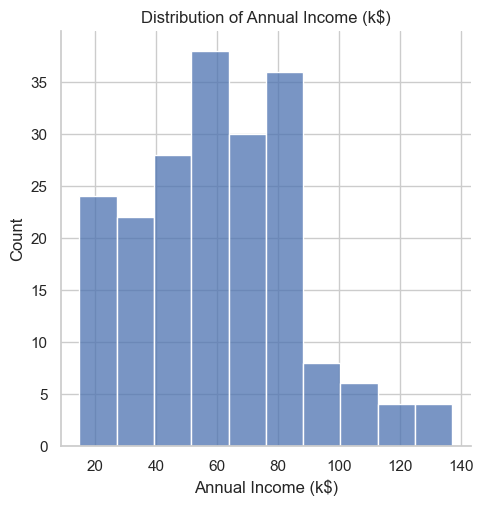

In [53]:
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

Distribution of Age

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

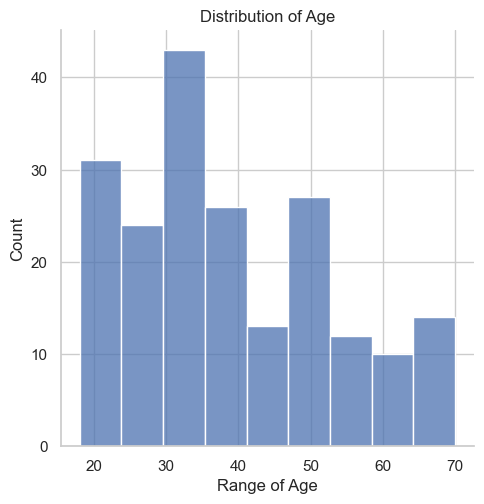

In [54]:
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

Distribution of Spending Score

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

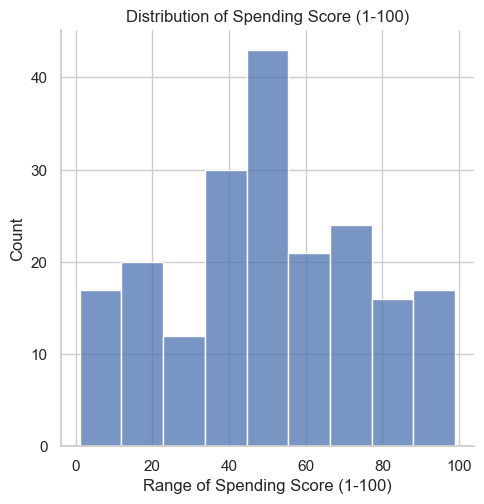

In [55]:
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

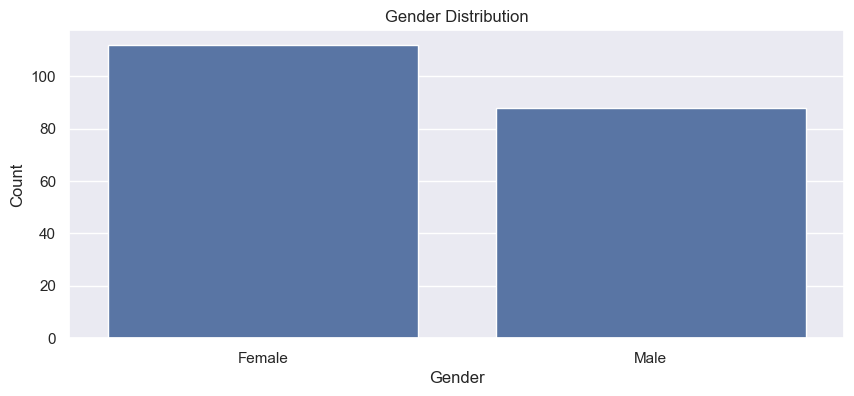

In [56]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10, 4))
sns.barplot(x = genders.index, y = genders.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [57]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [58]:
df = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [59]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


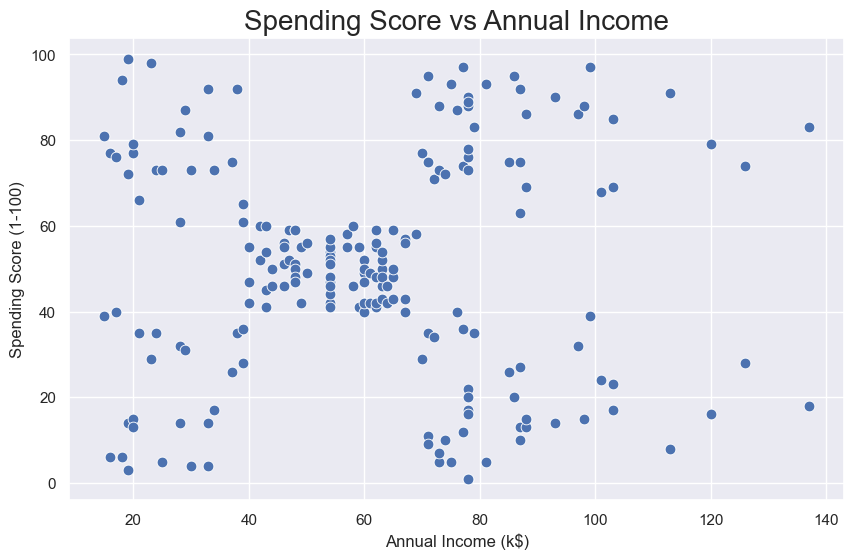

In [60]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = X, s = 60)
plt.title('Spending Score vs Annual Income', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [61]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)

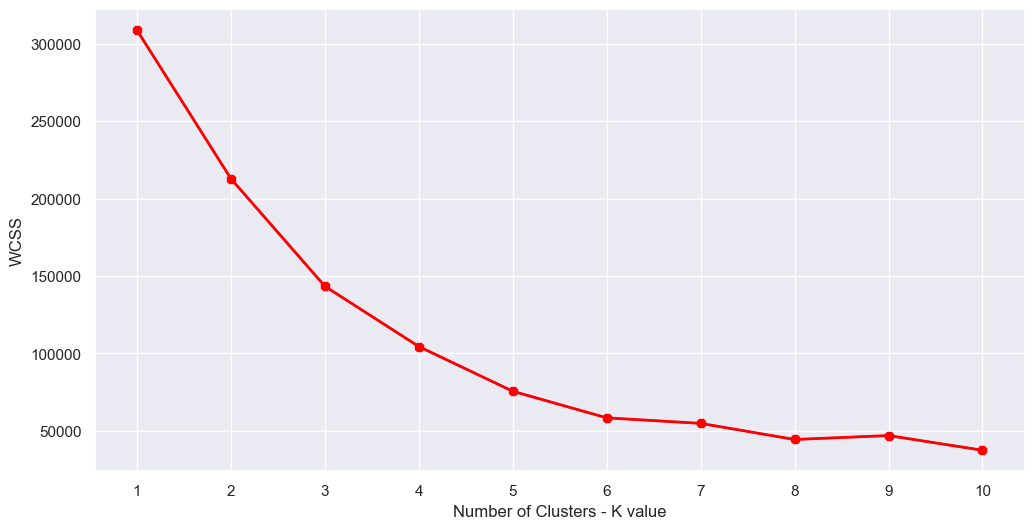

In [62]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("Number of Clusters - K value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [63]:
km1 = KMeans(n_clusters = 5)
km1.fit(X)
y = km1.predict(X)
df['label'] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


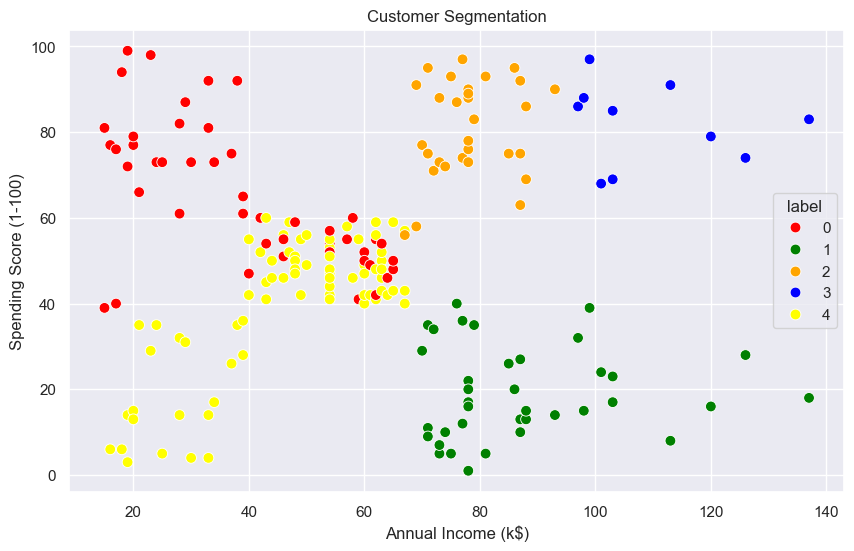

In [64]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "label", palette = ['red', 'green', 'orange', 'blue', 'yellow'], legend = 'full', data = df, s = 60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation")
plt.show()

In [65]:
cust1 = df[df["label"] == 1]
print('Number of customers in 1st groups =' , len(cust1))
print('they are -' , cust1['CustomerID'].values)
print("----------------------------------------------")

cust2 = df[df["label"] ==  2]
print('Number of customers in 2nd groups =' , len(cust2))
print('they are -' , cust2["CustomerID"].values)
print("----------------------------------------------")

cust3 = df[df["label"] == 0]
print('Number of customers in 3rd groups =' , len(cust3))
print('they are -' , cust3['CustomerID'].values)
print("----------------------------------------------")

cust4 = df[df["label"] == 3]
print('Number of customers in 4th groups =' , len(cust4))
print('they are -' , cust4['CustomerID'].values)
print("----------------------------------------------")

cust5 = df[df["label"] == 4]
print('Number of customers in 5th groups =' , len(cust5))
print('they are -' , cust5['CustomerID'].values)
print("----------------------------------------------")

Number of customers in 1st groups = 38
they are - [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
----------------------------------------------
Number of customers in 2nd groups = 31
they are - [121 123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154
 156 158 160 162 164 166 168 170 172 174 176 178 180]
----------------------------------------------
Number of customers in 3rd groups = 47
they are - [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  52  53  59  62  66  69  76  79  85  88
  89  92  96  98 100 104 106 112 114 115 116]
----------------------------------------------
Number of customers in 4th groups = 10
they are - [182 184 186 188 190 192 194 196 198 200]
----------------------------------------------
Number of customers in 5th groups = 74
they are - [  3   7   9  11  13  15  17  19  21  23  25 

In [66]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [67]:
df2 = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
X2 = df2[[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [69]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++")
    km.fit(X2)
    wcss.append(km.inertia_)

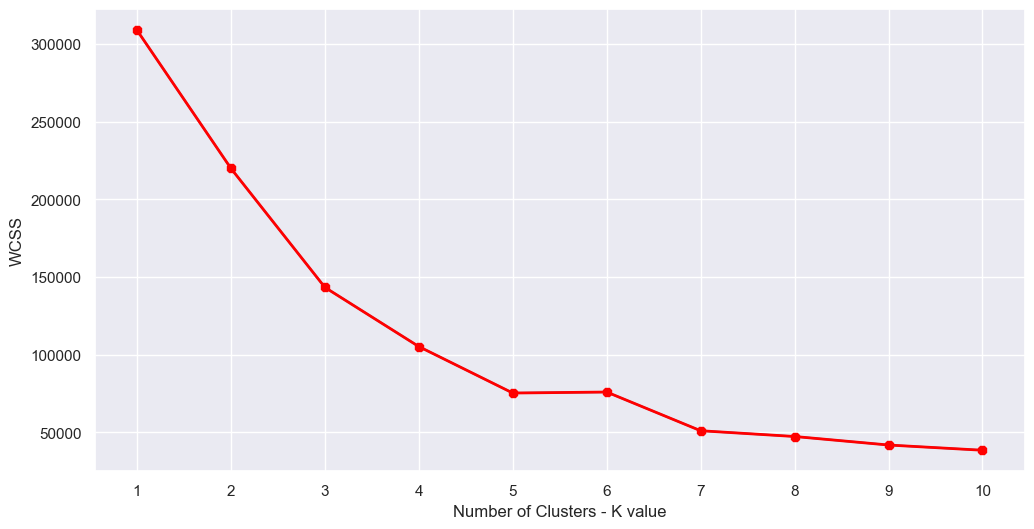

In [70]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("Number of Clusters - K value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [78]:
km2 = KMeans(n_clusters = 5)
km2.fit(X)
y2 = km2.predict(X)
df2['label'] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


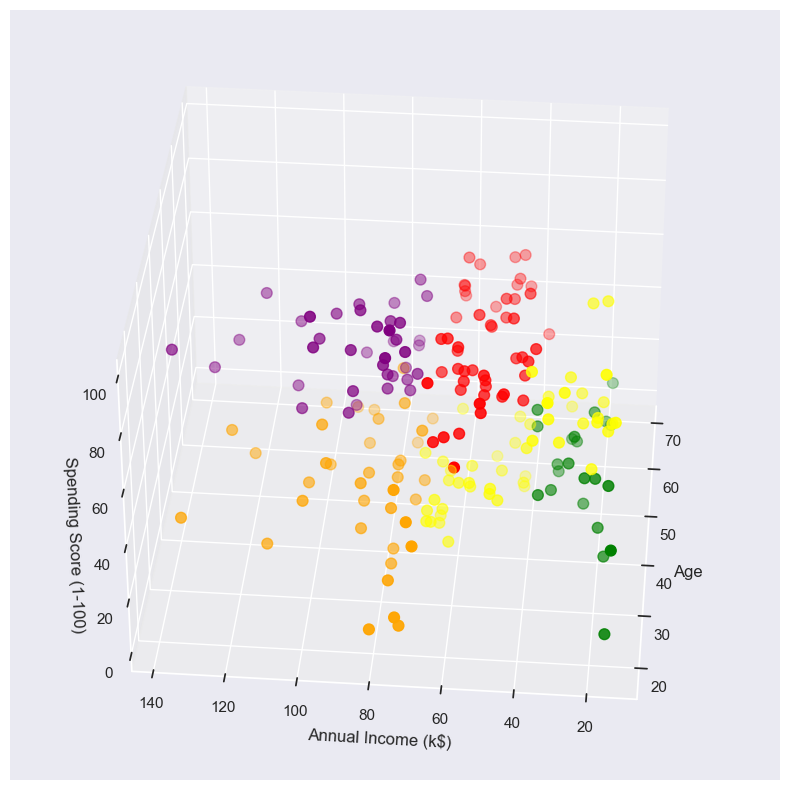

In [80]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2["Age"][df2["label"] == 0], df2["Annual Income (k$)"][df2["label"] == 0], df2["Spending Score (1-100)"][df2["label"] == 0], c='purple', s=60)
ax.scatter(df2["Age"][df2["label"] == 1], df2["Annual Income (k$)"][df2["label"] == 1], df2["Spending Score (1-100)"][df2["label"] == 1], c='red', s=60)
ax.scatter(df2["Age"][df2["label"] == 2], df2["Annual Income (k$)"][df2["label"] == 2], df2["Spending Score (1-100)"][df2["label"] == 2], c='orange', s=60)
ax.scatter(df2["Age"][df2["label"] == 3], df2["Annual Income (k$)"][df2["label"] == 3], df2["Spending Score (1-100)"][df2["label"] == 3], c='green', s=60)
ax.scatter(df2["Age"][df2["label"] == 4], df2["Annual Income (k$)"][df2["label"] == 4], df2["Spending Score (1-100)"][df2["label"] == 4], c='yellow', s=60)

ax.view_init(35, 185)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [81]:
cust1 = df2[df2["label"] == 0]
print('Number of customers in 1st groups =' , len(cust1))
print('they are -' , cust1['CustomerID'].values)
print("----------------------------------------------")

cust2 = df2[df2["label"] ==  1]
print('Number of customers in 2nd groups =' , len(cust2))
print('they are -' , cust2["CustomerID"].values)
print("----------------------------------------------")

cust3 = df2[df2["label"] == 2]
print('Number of customers in 3rd groups =' , len(cust3))
print('they are -' , cust3['CustomerID'].values)
print("----------------------------------------------")

cust4 = df2[df2["label"] == 3]
print('Number of customers in 4th groups =' , len(cust4))
print('they are -' , cust4['CustomerID'].values)
print("----------------------------------------------")

cust5 = df2[df2["label"] == 4]
print('Number of customers in 5th groups =' , len(cust5))
print('they are -' , cust5['CustomerID'].values)
print("----------------------------------------------")

Number of customers in 1st groups = 39
they are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
----------------------------------------------
Number of customers in 2nd groups = 51
they are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  82  83  84  86  87  90  91  93  94  95  97  99
 102 103 105 107 108 109 110 111 113 117 118 119 120 122 123]
----------------------------------------------
Number of customers in 3rd groups = 38
they are - [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
----------------------------------------------
Number of customers in 4th groups = 22
they are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
----------------------------------------------
Number of customers 